In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchtyping import TensorType
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [2]:
class MichaelisMenten():
    def __init__(self):
        self.v = torch.randn(1, requires_grad=True)
        self.k = torch.randn(1, requires_grad=True)
    @property
    def params(self):
        return [self.v, self.k]

    def forward(self,x):
        if isinstance(x, TensorType):
            return (self.v*x)/(self.k+x)
        else:
            x = torch.tensor(x)
            return (self.v*x)/(self.k+x)
    

def square_loss(y_pred:TensorType, y:TensorType):
    return ((y_pred-y)**2)*0.5


def sgd(params, lr, batch_size = 1):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()


df = pd.DataFrame(
    {
        'GTP':[10, 100, 1000], 
        '0ATP': [1.94, 7.44, 12.92], 
        '003ATP': [1.72, 7.35, 12.94], 
        '010ATP': [1.67, 6.48, 13.59], 
        '030ATP':[1.11, 6.02, 12.31], 
        '100ATP':[0.59, 3.91, 10.17], 
        '300ATP': [0.23, 1.64, 6.33]
    }
)

  0%|                                                                                                                           | 0/6 [00:00<?, ?it/s]C:\Users\hp\AppData\Local\Temp\ipykernel_13176\4276096158.py:23: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:836.)
  all_loss.append(float(ls.mean()))


On epoch 14000, loss: 0.038029209333435246


 33%|██████████████████████████████████████▎                                                                            | 2/6 [00:07<00:14,  3.50s/it]

On epoch 4000, loss: 0.02581690146967995


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 4/6 [00:56<00:30, 15.18s/it]

On epoch 6000, loss: 0.030335288728307517
On epoch 18000, loss: 0.035423677506652755


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:52<00:00, 18.78s/it]

0.051200748458145304


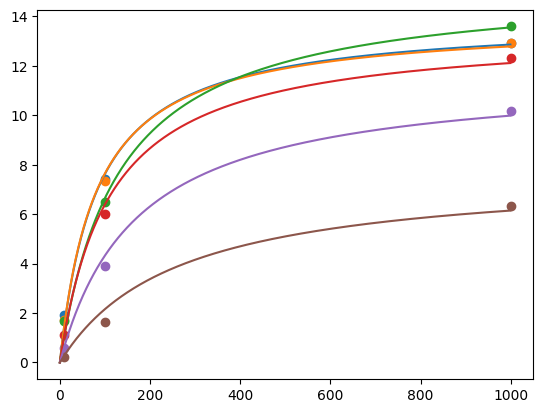

In [3]:
lr = 1.2
#num_epochs = 20000
num_epochs = 80000
all_loss = []

fit_v = []
fit_k = []

pbar = tqdm(range(1, 7), ncols=150, colour='cyan')
fit_epoch = 0
for i in pbar:
    v_list = []
    k_list = []
    m = MichaelisMenten()
    for epoch in range(num_epochs):
        pred = m.forward(df['GTP'].values)
        ls = square_loss(pred, torch.tensor(df.iloc[:, i].values)) 
        ls.mean().backward()
        sgd([m.v, m.k], lr, 1)
        #optimizer = torch.optim.SGD([m.v, m.k], lr)
        #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
        #scheduler.step()
        all_loss.append(float(ls.mean()))
        v_list.append(m.v.detach()), k_list.append(m.k.detach())
        if epoch%1000 ==0:
            if np.array(all_loss[-100:]).mean() <= 0.03803:
                fit_epoch = epoch
                print(f'On epoch {epoch}, loss: {np.array(all_loss[-100:]).mean()}')
                break


    #plt.plot(np.arange(train_epoch), all_loss[:-1])
    #plt.title(f'lr: {lr}, epochs: {num_epochs}, k: {m.k.detach()}, v: {m.v.detach()}')
    k_mean = np.array(k_list[int(0.1*fit_epoch):]).mean()
    v_mean = np.array(v_list[int(0.1*fit_epoch):]).mean()
    fit_k.append(k_mean)
    fit_v.append(v_mean)
    plt.scatter(df['GTP'], df.iloc[:, i])
    a = np.arange(1000)
    plt.plot(a, (v_mean*a)/(k_mean+a))

print(np.array(all_loss[-100:]).mean())

In [4]:
fit_k

[np.float32(82.443115),
 np.float32(80.56345),
 np.float32(130.2616),
 np.float32(110.36116),
 np.float32(170.00621),
 np.float32(258.07742)]

In [5]:
np.array(k_list[int(0.1*1000):]).mean()

np.float32(258.07742)

In [6]:
np.array(all_loss[-100:]).mean()

np.float64(0.051200748458145304)

In [7]:
np.array(all_loss[-100:]).mean()

np.float64(0.051200748458145304)

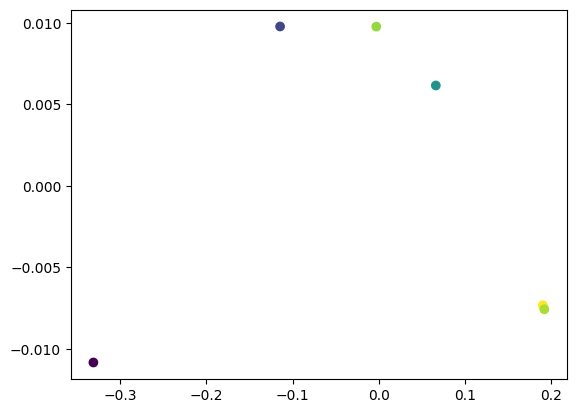

In [8]:
activity = df.iloc[:, 1:].values
def pca_transform(data):
    scaler = StandardScaler()
    pca = PCA(2)
    s_data = scaler.fit_transform(data)
    output =  pca.fit_transform(s_data.T)
    return output, pca.explained_variance_ratio_
o, r = pca_transform(activity)
plt.scatter(*o.T, c=df.iloc[0, 1:])

In [9]:
gtp_conc = 

SyntaxError: invalid syntax (1881478731.py, line 1)